In [5]:
# PHASE 0 : Environment Setup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


plt.style.use('ggplot')

import nltk


In [6]:
# PHASE 1: Data Loading & Exploration (EDA)
df = pd.read_csv("../data/Reviews.csv")
#df.head() displays the first five records of the dataset for initial inspection.”
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
#“df.info() provides information about data types and detects missing values.”
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
#“This step helps identify missing values so they can be handled during preprocessing.”
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
df.shape


(568454, 10)

In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Like you can see this dataset is quite large roughly 50k. so , we can just down sample this dataset simply by using :
# df = df.head(500)
# print(df.shape)
# O/P -> (500, 10)
# but off course we are not doint that

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install nltk

In [14]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [15]:
# We are going to running our setiment analysis on this row of data in this entire row of dataset
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [16]:
# Quick EDA
df['Score']

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568454, dtype: int64

Text(0.5, 0, 'Review Stars')

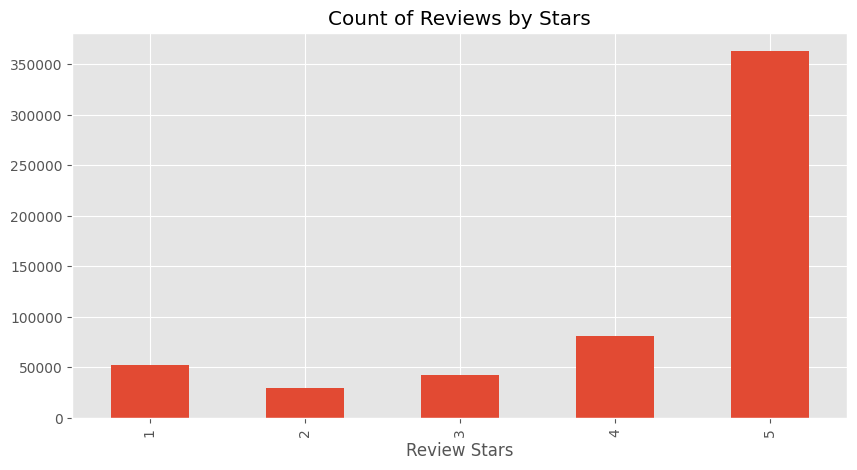

In [17]:
ax = df['Score'].value_counts().sort_index()\
    .plot(kind = 'bar' ,
          title = 'Count of Reviews by Stars',
          figsize=(10,5))
ax.set_xlabel('Review Stars')

In [18]:
# PHASE 2: NLP & VADER Sentiment Analysis
#Basic NLTK 
example = df['Text'][80]
example

"This peppermint stick is delicious and fun to eat.  My dad got me one for Christmas because he remembered me having a similar one when I was a little girl.  I'm 30 now and I love it!"

In [19]:
# NLTK can tockenize this sentence 
tokens= nltk.word_tokenize(example)
tokens[:10]

['This',
 'peppermint',
 'stick',
 'is',
 'delicious',
 'and',
 'fun',
 'to',
 'eat',
 '.']

In [20]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [21]:
## Assign part-of-speech tags to each token in the list
# Helps identify nouns, verbs, adjectives, etc.
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('peppermint', 'NN'),
 ('stick', 'NN'),
 ('is', 'VBZ'),
 ('delicious', 'JJ'),
 ('and', 'CC'),
 ('fun', 'NN'),
 ('to', 'TO'),
 ('eat', 'VB'),
 ('.', '.')]

In [22]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [23]:
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  This/DT
  peppermint/NN
  stick/NN
  is/VBZ
  delicious/JJ
  and/CC
  fun/NN
  to/TO
  eat/VB
  ./.
  My/PRP$
  dad/NN
  got/VBD
  me/PRP
  one/CD
  for/IN
  (PERSON Christmas/NNP)
  because/IN
  he/PRP
  remembered/VBD
  me/PRP
  having/VBG
  a/DT
  similar/JJ
  one/CD
  when/WRB
  I/PRP
  was/VBD
  a/DT
  little/JJ
  girl/NN
  ./.
  I/PRP
  'm/VBP
  30/CD
  now/RB
  and/CC
  I/PRP
  love/VBP
  it/PRP
  !/.)


In [24]:
#Step 1: VADER Sentiment Scoring
'''we will use NLTK's SentimentIntensityAnalyzer to get the pos/neu/neg scores of the text
        # This uses a "bag of word" approach:
            1.Stop word are removed (eg : is ,and, are etc)
            2.each word is scored and combined to a total Score'''

from nltk.sentiment import SentimentIntensityAnalyzer
 # this is just a progress bar tracker for when we are going to do some loops in this data
from tqdm import tqdm  
nltk.download('vader_lexicon')
# # Step 1: Initialize tools
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
# We can run this on any Text and see what the sentiment is based on the words
sia.polarity_scores("I'm  so very happy!!")

{'neg': 0.0, 'neu': 0.382, 'pos': 0.618, 'compound': 0.7055}

In [26]:
sia.polarity_scores("This is the worst thing ever ")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [27]:
sia.polarity_scores(example)


{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9098}

In [28]:
#Runs the polarity score on the entire dataset
res = dict()
for i , row in tqdm(df.iterrows(), total = len(df)):
    text = row["Text"]
    myid = row["Id"]
    res[myid] = sia.polarity_scores(text)




100%|█████████████████████████████████████████████████████████████████████████| 568454/568454 [17:35<00:00, 538.51it/s]


In [29]:
# Creating a DataFrame from VADER sentiment scores to enable easier merging and analysis
vaders= pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
568450,0.072,0.600,0.327,0.8589
568451,0.190,0.697,0.114,-0.4848
568452,0.037,0.884,0.078,0.4352
568453,0.041,0.506,0.452,0.9717


In [30]:
# We want to store 'res' into a pandas Dataframe because that easier to work with
vaders= pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = { 'index' : 'Id'})
vaders = vaders.merge(df, how = 'left')

In [31]:
# Now we have sentiment scores and metadata
vaders.head()


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


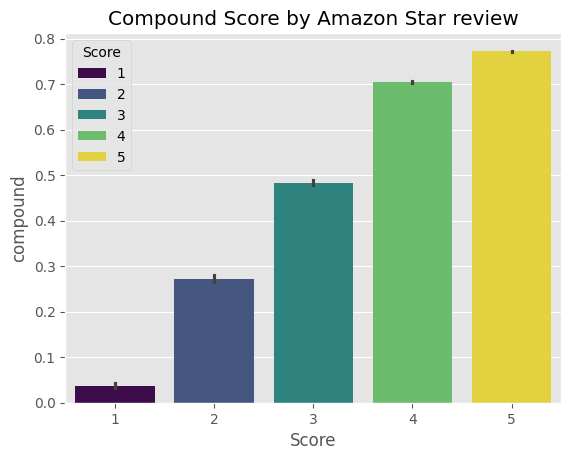

In [32]:
# Plot VADER results
ax = sns.barplot(data= vaders , x = 'Score' , y = 'compound',hue = 'Score',palette='viridis')
ax.set_title('Compound Score by Amazon Star review')
plt.show()

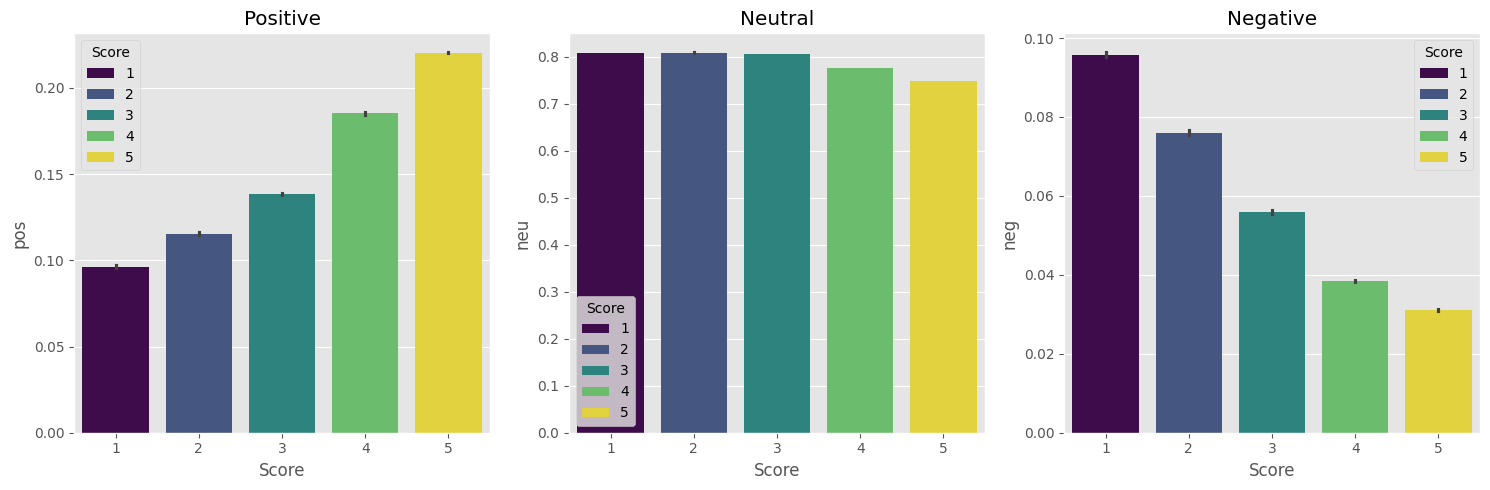

In [33]:
# Here we can see The Positive,Neutral and Negative 
fig , axs = plt.subplots(1,3, figsize = (15,5))
sns.barplot(data= vaders , x = 'Score' , y ='pos' , ax= axs[0],hue = 'Score',palette='viridis')
sns.barplot(data= vaders , x = 'Score' , y ='neu' , ax= axs[1],hue = 'Score',palette='viridis')
sns.barplot(data= vaders , x = 'Score' , y ='neg' , ax= axs[2],hue = 'Score',palette='viridis')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [34]:
# PHASE 3: Roberta Pretrained Model
#       1. use a model trained of large corpus of data.
#       2. Transformer model accounts for the word but also the context related to other words.

In [35]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [36]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
import time

C:\Users\ricky\anaconda3\envs\torch_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
# Device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [43]:
# =========================
# Load RoBERTa model
# =========================
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL, use_safetensors=True
).to(device)

model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [44]:

# Test on example
example = "Love the flavor, but it made me sick for two days."


print("VADER:", sia.polarity_scores(example))

VADER: {'neg': 0.277, 'neu': 0.561, 'pos': 0.162, 'compound': -0.431}


In [45]:
def roberta_polarity_scores(example):
    encoded_text = tokenizer(
        example, return_tensors="pt", truncation=True, max_length=256
    ).to(device)
    
    with torch.no_grad():
        output = model(**encoded_text)
    
    scores = torch.softmax(output.logits, dim=1).cpu().numpy()[0]
    
    scores_dict = {
        "roberta_neg": float(scores[0]),
        "roberta_neu": float(scores[1]),
        "roberta_pos": float(scores[2])
    }
    return scores_dict

In [48]:
# Like you can see roberta thinks the sentance is much more negative then vader 
print(roberta_polarity_scores(example))

{'roberta_neg': 0.5862955451011658, 'roberta_neu': 0.2600325644016266, 'roberta_pos': 0.15367183089256287}


In [49]:

texts = df["Text"].tolist()
ids = df["Id"].tolist()

In [50]:

# Batch inference

batch_size = 128
results = []

start_time = time.time()

for i in tqdm(range(0, len(texts), batch_size), desc="Processing reviews"):
    batch_texts = texts[i:i + batch_size]
    batch_ids = ids[i:i + batch_size]

    # Tokenize batch
    encoded = tokenizer(
        batch_texts,
        padding=True,
        truncation=True,
        max_length=256,
        return_tensors="pt"
    ).to(device)

    # RoBERTa inference
    with torch.no_grad():
        outputs = model(**encoded)

    probs = torch.softmax(outputs.logits, dim=1).cpu().numpy()

    # Combine with VADER
    for text, idx, p in zip(batch_texts, batch_ids, probs):
        vader = sia.polarity_scores(text)
        vader = {f"vader_{k}": v for k, v in vader.items()}

        results.append({
            "Id": idx,
            **vader,
            "roberta_neg": float(p[0]),
            "roberta_neu": float(p[1]),
            "roberta_pos": float(p[2])
        })
# Convert to DataFrame

result_df = pd.DataFrame(results)

print("Completed in:", round((time.time() - start_time) / 60, 2), "minutes")
print(result_df.head())


Processing reviews:   0%|▏                                                         | 14/4442 [00:21<1:51:55,  1.52s/it]


KeyboardInterrupt: 

In [ ]:

# Convert results to DataFrame 
result_df = pd.DataFrame(results)

# Merge so sentiment columns come first (left side)
final_df = result_df.merge(df, on="Id", how="left")

# Save
final_df.to_csv(
    "result.csv",
    index=False
)

print("✅ Merge completed and file saved")


In [ ]:
final_df

In [ ]:
result_df

In [ ]:
final_df = pd.read_csv("result.csv")

In [ ]:
final_df = pd.read_csv("result.csv")
final_df.head()

In [ ]:
final_df.head()

In [ ]:
#Compare scores between models
final_df.columns

In [ ]:


df = pd.read_csv("../data/Reviews.csv")
final_df = pd.read_csv("result.csv")

merged_df = final_df.merge(
    df,
    on="Id",   # common column
    how="right"
)


In [10]:
merged_df=pd.read_csv("../data/final_result_vader+roberta.csv")

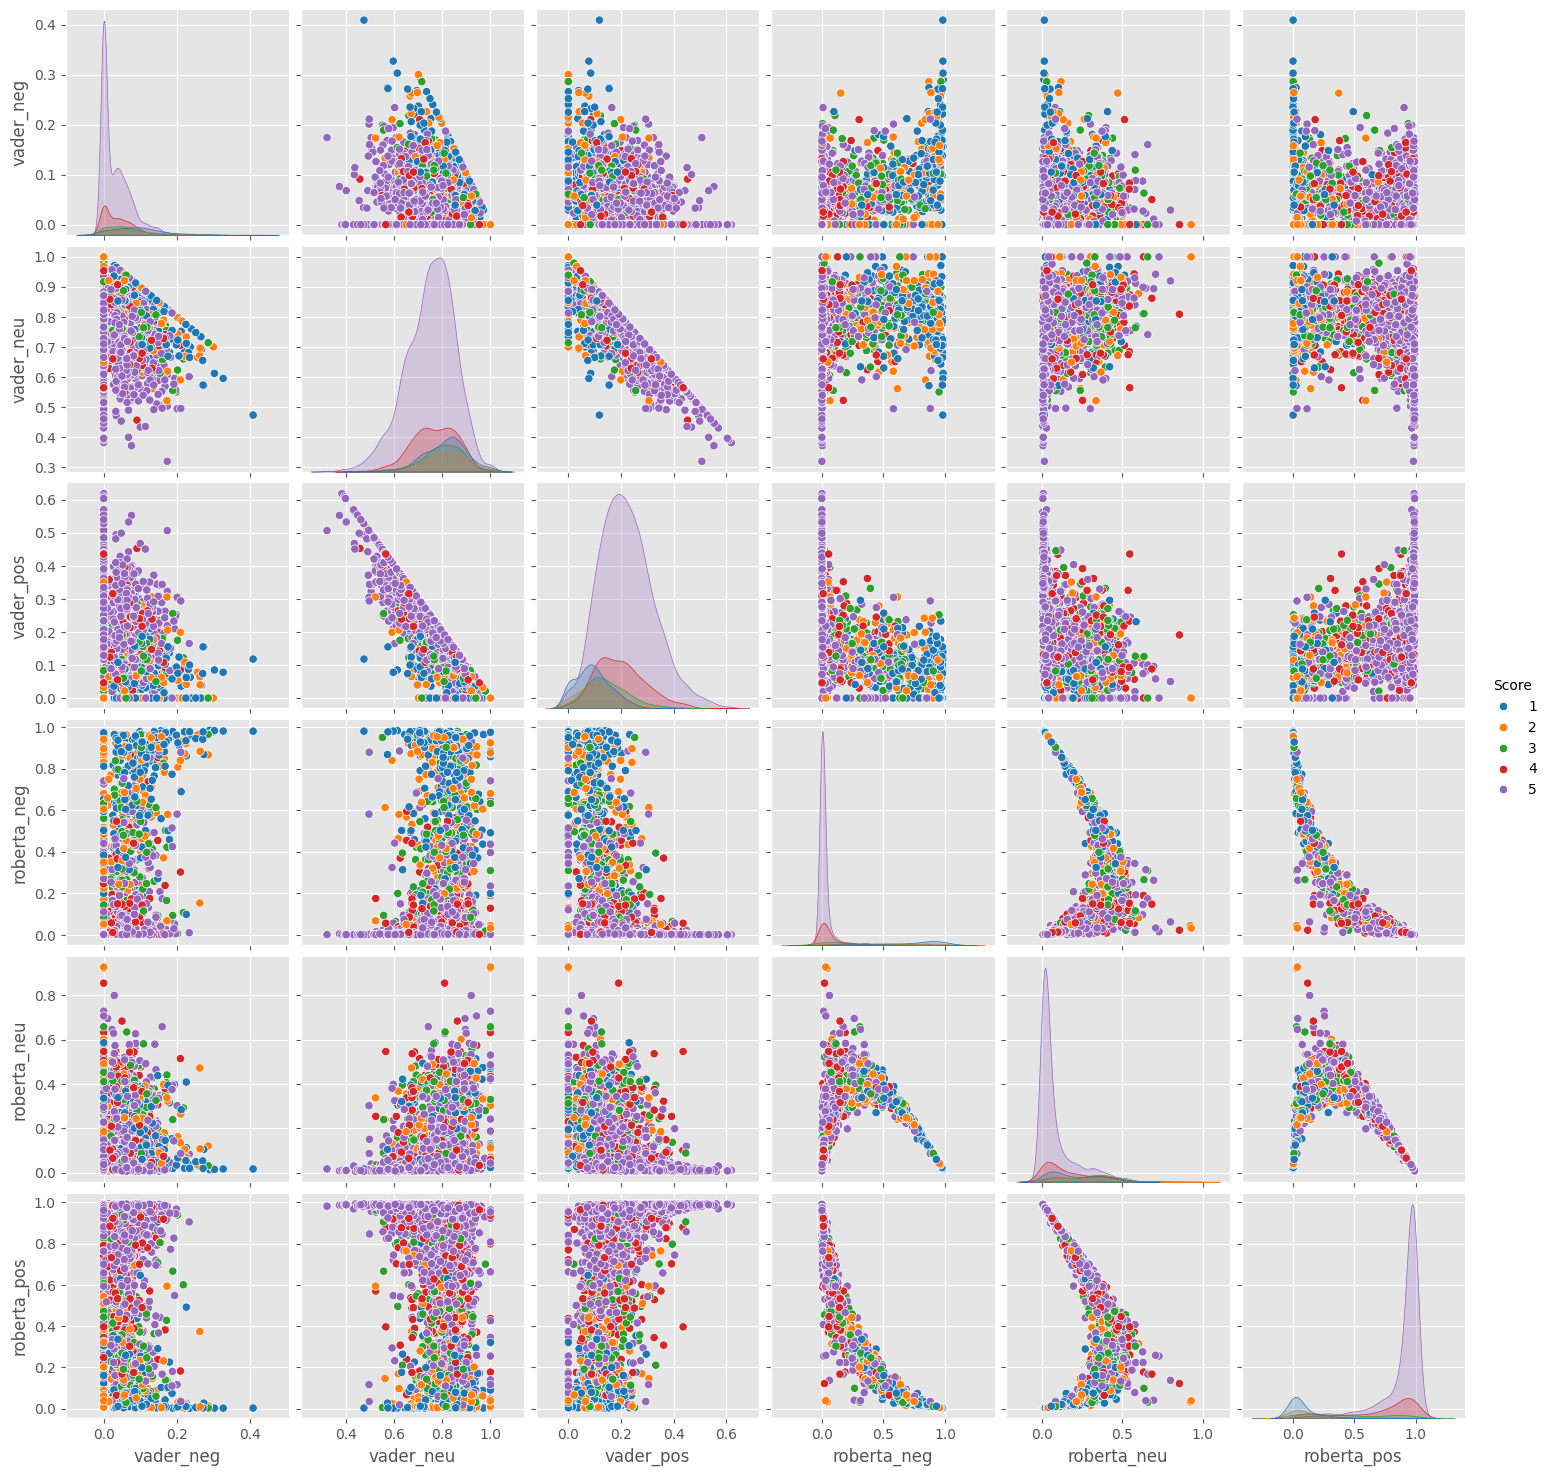

In [58]:
#PHASE - 4: Combine and Compair
#pairplot let us see the comparison b/w each observation and what each feature looks like
sample_df = merged_df.sample(3000, random_state=42)

sns.pairplot(
    sample_df,
    vars=[
        'vader_neg','vader_neu','vader_pos',
        'roberta_neg','roberta_neu','roberta_pos'
    ],
    hue='Score',
    palette='tab10'
)
plt.show()


In [8]:
# Phase - 5 : Review Examples
    #1. Positive 1 star and Negative 5 Stars Review
# Lets look at some examples where the model scoring and review score differ the most


In [11]:
merged_df.query('Score == 1').sort_values('roberta_pos',ascending=False)['Text'].values[0]

"loved it! it worked better that I expected, I can't wait to order some more.  we made bath fizzies and the came out fantastic!!!"

In [12]:
merged_df.query('Score == 1').sort_values('vader_pos',ascending=False)['Text'].values[15]

"This is without a doubt the NASTIEST tasting stuff ever..... it was like drinking seawater!!!!Nothing tasted like mango and it surely doesn't taste like coconut water."

In [13]:
# Negative Sentiment 5 - Start Review

In [14]:
merged_df.query('Score == 5')\
        .sort_values('roberta_neg',
                     ascending=False)['Text']\
        .values[5]

'THEY ARE DELICIOUS NOT SALTY YOU CAN SIT AND EAT 2-3 2 OUNCE BAGS AT A TIME I GIVE THESE 5 STARS PLUS I HAVE TO STOP MYSELF FROM EATING THEM THEY ARE DELICIOUS.'

In [15]:
merged_df.query('Score == 5').sort_values('vader_neg',ascending=False)['Text'].values[0]

'These are good but are not sweet! Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good, Good,'

In [16]:
# Ground truth sentiment from ratings
def map_score_to_sentiment(score):
    if score <= 2:
        return 0  # negative
    elif score == 3:
        return 1  # neutral
    else:
        return 2  # positive

merged_df["true_sentiment"] = merged_df["Score"].apply(map_score_to_sentiment)


In [17]:
# VADER predicted sentiment
merged_df["vader_pred"] = merged_df[
    ["vader_neg", "vader_neu", "vader_pos"]
].idxmax(axis=1)

merged_df["vader_pred"] = merged_df["vader_pred"].map({
    "vader_neg": 0,
    "vader_neu": 1,
    "vader_pos": 2
})


In [18]:
# RoBERTa predicted sentiment
merged_df["roberta_pred"] = merged_df[
    ["roberta_neg", "roberta_neu", "roberta_pos"]
].idxmax(axis=1)

merged_df["roberta_pred"] = merged_df["roberta_pred"].map({
    "roberta_neg": 0,
    "roberta_neu": 1,
    "roberta_pos": 2
})


In [19]:
from sklearn.metrics import f1_score, classification_report

y_true = merged_df["true_sentiment"]
y_vader = merged_df["vader_pred"]
y_roberta = merged_df["roberta_pred"]

vader_f1 = f1_score(y_true, y_vader, average="weighted")
roberta_f1 = f1_score(y_true, y_roberta, average="weighted")

print("VADER F1-score:", round(vader_f1, 4))
print("Pretrained RoBERTa F1-score:", round(roberta_f1, 4))


VADER F1-score: 0.0269
Pretrained RoBERTa F1-score: 0.8459


In [114]:
comparison_table = pd.DataFrame({
    "Model": ["VADER", "Pretrained RoBERTa"],
    "F1-score (weighted)": [vader_f1, roberta_f1]
})

comparison_table


,Model,F1-score (weighted)
0,VADER,0.026940
1,Pretrained RoBERTa,0.845876


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

vader_metrics = {
    "accuracy": accuracy_score(y_true, y_vader),
    "precision": precision_score(y_true, y_vader, average="weighted"),
    "recall": recall_score(y_true, y_vader, average="weighted"),
    "f1-score": vader_f1
}

roberta_metrics = {
    "accuracy": accuracy_score(y_true, y_roberta),
    "precision": precision_score(y_true, y_roberta, average="weighted"),
    "recall": recall_score(y_true, y_roberta, average="weighted"),
    "f1-score": roberta_f1
}


In [119]:


metrics_df = pd.DataFrame([vader_metrics, roberta_metrics],
                          index=["VADER", "RoBERTa"])

metrics_df


,accuracy,precision,recall,f1-score
VADER,0.083227,0.860927,0.083227,0.026940
RoBERTa,0.845168,0.846838,0.845168,0.845876


In [23]:
import json
import os

# this will create vader_roerta folder inside models
os.makedirs("../models/vader_roberta", exist_ok=True)

#save VADER and pre-roberta metrices
pre_roberta = {
    "Pre-trained_roberta": roberta_metrics
}

with open("../models/vader_roberta/Pre_roberta_metrics.json", "w") as f:
    json.dump(pre_roberta, f, indent=4)


In [ ]:
os.makedirs("../models/vader_roberta", exist_ok=True)

#save VADER and pre-roberta metrices
vader = {
    "VADER": vader_metrics
}

with open("../models/vader_roberta/vader_metrics.json", "w") as f:
    json.dump(vader, f, indent=4)